In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data_cb/cities.csv"

# # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Dummy string to test with
cities2 = ["Paris"]

# set up lists to hold reponse info
lat = []
long =[]
temp = []
humidity = []
cloudiness = []
windspeed=[]
CleanCities = []
countries = []
print("Beginning Data Retrieval")
print("------------------------")

x=1
# Loop through the list of cities and perform a request for data on each
for city in cities:

    try:
        response = requests.get(query_url + city).json()
        CleanCities.append(response['name'])
        countries.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
    
        print(f"Processing Record {x} of Set 1 | {city}")
        
        x += 1
    
    except:
        print(f"{city} not found. Skipping...")
       

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | sao felix do xingu
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | chicama
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | pasni
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | yar-sale
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | olafsvik
Processing Record 20 of Set 1 | sinop
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | villa carlos paz
Processing Record 23 of Set

Processing Record 179 of Set 1 | lorengau
Processing Record 180 of Set 1 | sao filipe
Processing Record 181 of Set 1 | caravelas
Processing Record 182 of Set 1 | pangnirtung
Processing Record 183 of Set 1 | lugo
Processing Record 184 of Set 1 | cape town
Processing Record 185 of Set 1 | asau
coyuca not found. Skipping...
Processing Record 186 of Set 1 | tacuarembo
Processing Record 187 of Set 1 | champerico
Processing Record 188 of Set 1 | aripuana
Processing Record 189 of Set 1 | presidente medici
Processing Record 190 of Set 1 | shu
Processing Record 191 of Set 1 | iqaluit
Processing Record 192 of Set 1 | nsanje
Processing Record 193 of Set 1 | srednekolymsk
Processing Record 194 of Set 1 | portales
Processing Record 195 of Set 1 | nanortalik
Processing Record 196 of Set 1 | bredasdorp
Processing Record 197 of Set 1 | price
Processing Record 198 of Set 1 | hauterive
Processing Record 199 of Set 1 | ulladulla
Processing Record 200 of Set 1 | fortuna
Processing Record 201 of Set 1 | sa

Processing Record 360 of Set 1 | hambantota
Processing Record 361 of Set 1 | kitimat
Processing Record 362 of Set 1 | les cayes
Processing Record 363 of Set 1 | necochea
Processing Record 364 of Set 1 | guerrero negro
Processing Record 365 of Set 1 | mayna
Processing Record 366 of Set 1 | half moon bay
Processing Record 367 of Set 1 | tocopilla
Processing Record 368 of Set 1 | sayan
Processing Record 369 of Set 1 | yerbogachen
Processing Record 370 of Set 1 | manta
Processing Record 371 of Set 1 | asyut
Processing Record 372 of Set 1 | talnakh
Processing Record 373 of Set 1 | mmabatho
Processing Record 374 of Set 1 | mackenzie
Processing Record 375 of Set 1 | linqiong
Processing Record 376 of Set 1 | tres arroyos
Processing Record 377 of Set 1 | mandalgovi
Processing Record 378 of Set 1 | marzuq
Processing Record 379 of Set 1 | sangar
Processing Record 380 of Set 1 | boyolangu
Processing Record 381 of Set 1 | san miguel
Processing Record 382 of Set 1 | carnarvon
Processing Record 383 o

In [5]:
# create a data frame from cities, lat, and temp
cities_weather = {
    "City": CleanCities,
    "Country": countries,
    "Lat": lat,
    "Long": long,
    "Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Windspeed": windspeed
}
cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df

,City,Country,Lat,Long,Temp,Humidity,Cloudiness,Windspeed
0,Mount Isa,AU,-20.73,139.50,8.00,33,0,1.50
1,Punta Arenas,CL,-53.15,-70.92,1.83,74,75,5.70
2,São Félix do Xingu,BR,-6.64,-51.99,32.23,32,0,3.15
3,Butaritari,KI,3.07,172.79,28.58,77,10,6.76
4,Busselton,AU,-33.65,115.33,10.56,92,31,3.40
...,...,...,...,...,...,...,...,...
525,Challapata,BO,-18.90,-66.77,12.02,30,0,1.71
526,Rāpar,IN,23.57,70.63,32.70,63,64,7.26
527,Caucayá,CO,-0.19,-74.78,25.89,89,69,0.53
528,Shāhgarh,IN,24.32,79.13,33.86,48,100,1.33


In [6]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
cities_weather_df.to_csv("../output_data/cb_cities_data.csv")

In [9]:
cities_weather_df = pd.read_csv("../output_data/cb_cities_data.csv")
cities_weather_df

,Unnamed: 0,City,Country,Lat,Long,Temp,Humidity,Cloudiness,Windspeed
0,0,Saint-Joseph,RE,-21.37,55.62,20.45,78,35,4.10
1,1,Provideniya,RU,64.38,-173.30,7.90,94,100,1.69
2,2,Carnarvon,AU,-24.87,113.63,18.00,68,75,2.60
3,3,Klaksvík,FO,62.23,-6.59,11.00,93,75,6.70
4,4,Chapais,CA,49.78,-74.85,22.00,49,1,5.70
...,...,...,...,...,...,...,...,...,...
560,560,Rongcheng,CN,30.63,117.85,21.76,94,96,1.43
561,561,Oruzgan,AF,32.83,66.00,26.98,16,15,2.55
562,562,Dunedin,NZ,-45.87,170.50,5.56,91,81,0.89
563,563,Palmares do Sul,BR,-30.26,-50.51,10.82,59,0,2.65


In [7]:

#Create Noerthn ans southern hemisphere datasets 
Northern_df = cities_weather_df.loc[(cities_weather_df["Lat"] >=0)].dropna()
Southern_df = cities_weather_df.loc[(cities_weather_df["Lat"] <0)].dropna()

Northern_df
Southern_df

,City,Country,Lat,Long,Temp,Humidity,Cloudiness,Windspeed
0,Mount Isa,AU,-20.73,139.50,8.00,33,0,1.50
1,Punta Arenas,CL,-53.15,-70.92,1.83,74,75,5.70
2,São Félix do Xingu,BR,-6.64,-51.99,32.23,32,0,3.15
4,Busselton,AU,-33.65,115.33,10.56,92,31,3.40
5,Rikitea,PF,-23.12,-134.97,22.59,80,66,8.39
...,...,...,...,...,...,...,...,...
519,Angoche,MZ,-16.23,39.91,22.45,73,0,5.85
521,Antofagasta,CL,-23.65,-70.40,14.00,67,90,3.60
525,Challapata,BO,-18.90,-66.77,12.02,30,0,1.71
527,Caucayá,CO,-0.19,-74.78,25.89,89,69,0.53


In [8]:
Northern_df
Southern_df
cities_weather_df


,City,Country,Lat,Long,Temp,Humidity,Cloudiness,Windspeed
0,Mount Isa,AU,-20.73,139.50,8.00,33,0,1.50
1,Punta Arenas,CL,-53.15,-70.92,1.83,74,75,5.70
2,São Félix do Xingu,BR,-6.64,-51.99,32.23,32,0,3.15
3,Butaritari,KI,3.07,172.79,28.58,77,10,6.76
4,Busselton,AU,-33.65,115.33,10.56,92,31,3.40
...,...,...,...,...,...,...,...,...
525,Challapata,BO,-18.90,-66.77,12.02,30,0,1.71
526,Rāpar,IN,23.57,70.63,32.70,63,64,7.26
527,Caucayá,CO,-0.19,-74.78,25.89,89,69,0.53
528,Shāhgarh,IN,24.32,79.13,33.86,48,100,1.33


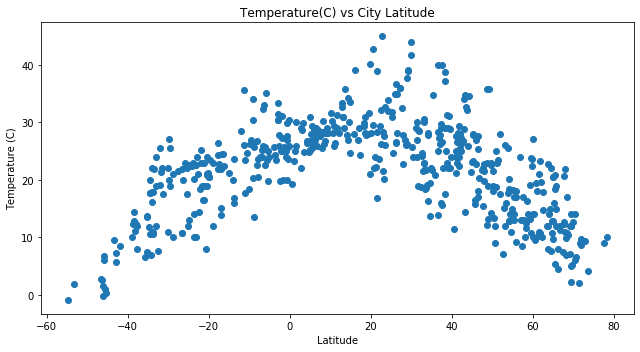

In [9]:
#Temperature (C) vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = cities_weather_df['Lat'].astype('float')
y_values = cities_weather_df['Temp'].astype('float')


# # Run linear regression
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title("Temperature(C) vs City Latitude")

# Print r square value
# print(f"R squared: {rvalue**2}")


# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Temperature vs. Latitude.png")

# Show plot
plt.show()


This plot shows that higher latitiudes are colder and that the northern hemisphere is warmer than the sourthern hemispher, which we know as it is summer in the northern hemispherere. It also should be norted that there are more cities inteh northern hemisphere. 

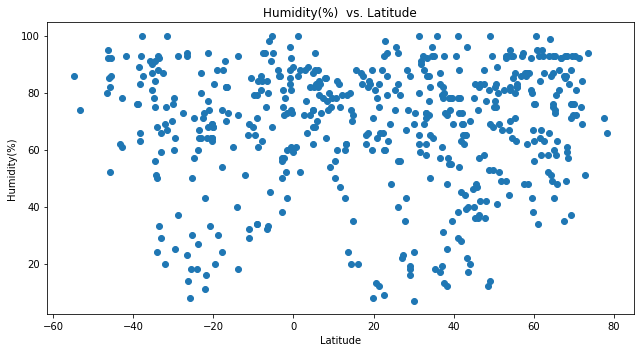

In [10]:
#Humidity(%)  vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = cities_weather_df['Lat'].astype('float')
y_values = cities_weather_df['Humidity'].astype('float')


# # Run linear regression
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel("Humidity(%)")
plt.title("Humidity(%)  vs. Latitude")

# Print r square value
# print(f"R squared: {rvalue**2}")



# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Humidty vs. Latitude.png")

# Show plot
plt.show()


This shows that the humidty appears to be well distributed across the hemispheres and that cities tend to be more humid than less humid. 

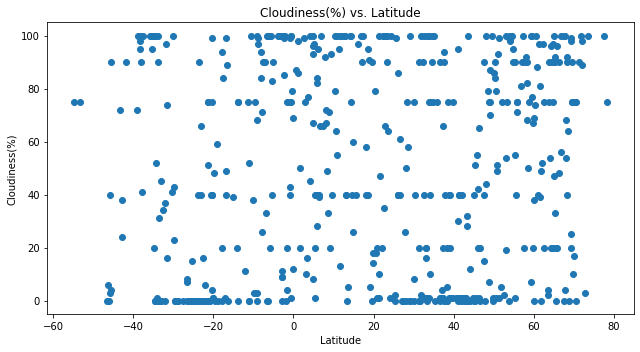

In [11]:
#Cloudiness vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = cities_weather_df['Lat'].astype('float')
y_values = cities_weather_df['Cloudiness'].astype('float')


# # Run linear regression
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel("Cloudiness(%)")
plt.title("Cloudiness(%) vs. Latitude")

# Print r square value
# print(f"R squared: {rvalue**2}")

# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Cloudiness vs. Latitude.png")

# Show plot
plt.show()

The fact that there are "horiontal lines" across indicates that cloudiness is not an exact measurement and more subjective. there is a fairly even distribution across the hemispheres of all cloudiness ranges. 

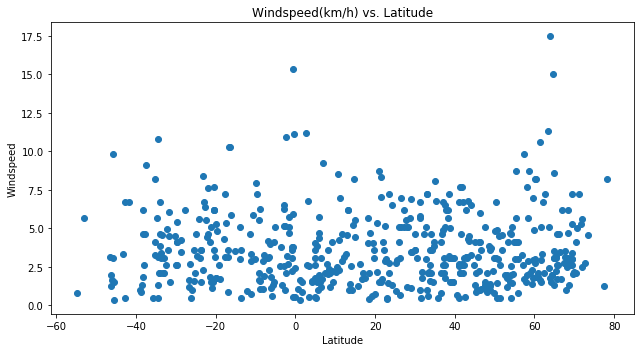

In [12]:
#Windspeed vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = cities_weather_df['Lat'].astype('float')
y_values = cities_weather_df['Windspeed'].astype('float')


# # Run linear regression
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title("Windspeed(km/h) vs. Latitude")


# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Windspeed vs. Latitude.png")

# Show plot
plt.show()

Fairly even distribution, with a few windy outliers. 

In [13]:
Northern_df
Southern_df
cities_weather_df


,City,Country,Lat,Long,Temp,Humidity,Cloudiness,Windspeed
0,Mount Isa,AU,-20.73,139.50,8.00,33,0,1.50
1,Punta Arenas,CL,-53.15,-70.92,1.83,74,75,5.70
2,São Félix do Xingu,BR,-6.64,-51.99,32.23,32,0,3.15
3,Butaritari,KI,3.07,172.79,28.58,77,10,6.76
4,Busselton,AU,-33.65,115.33,10.56,92,31,3.40
...,...,...,...,...,...,...,...,...
525,Challapata,BO,-18.90,-66.77,12.02,30,0,1.71
526,Rāpar,IN,23.57,70.63,32.70,63,64,7.26
527,Caucayá,CO,-0.19,-74.78,25.89,89,69,0.53
528,Shāhgarh,IN,24.32,79.13,33.86,48,100,1.33


R squared:  0.48


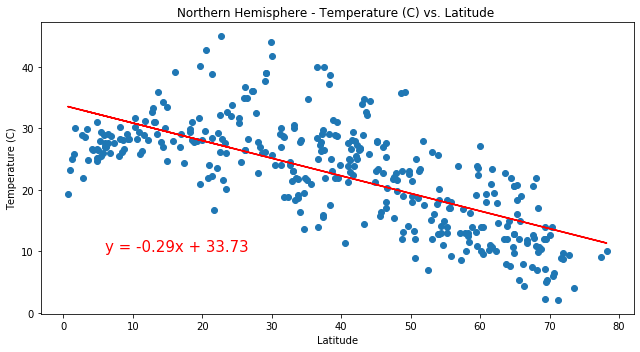

In [14]:
#Northern Hemisphere - Temperature (C) vs. Latitude 
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_df['Lat'].astype('float')
y_values = Northern_df['Temp'].astype('float')


# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title("Northern Hemisphere - Temperature (C) vs. Latitude ")

# Print r square value
print(f"R squared: {(rvalue**2):5.2f}")



# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Northern Hemisphere - Temperature (C) vs. Latitude .png")

# Show plot
plt.show()

Not a great regression, showing it is getting colder towards the poles. 

R squared:  0.61


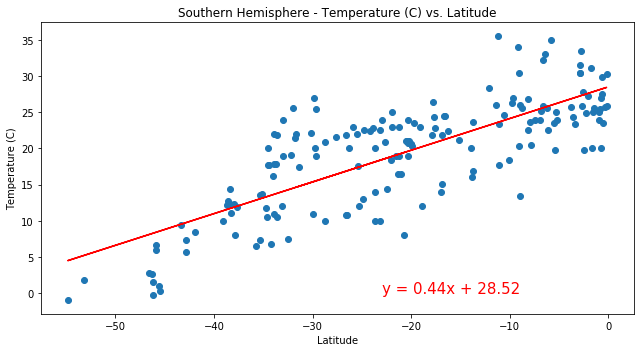

In [16]:
#Southern Hemisphere - Temperature (C) vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_df['Lat'].astype('float')
y_values = Southern_df['Temp'].astype('float')


# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,0),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title("Southern Hemisphere - Temperature (C) vs. Latitude")

# Print r square value
print(f"R squared: {(rvalue**2):5.2f}")


# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Southern Hemisphere vs. Latitude.png")

# Show plot
plt.show()

Better regression than the Northern hemisphere which is likely to because it is summer inteh north and the cities near the equator are colder and give a cleaner trend. 

R squared:  0.00


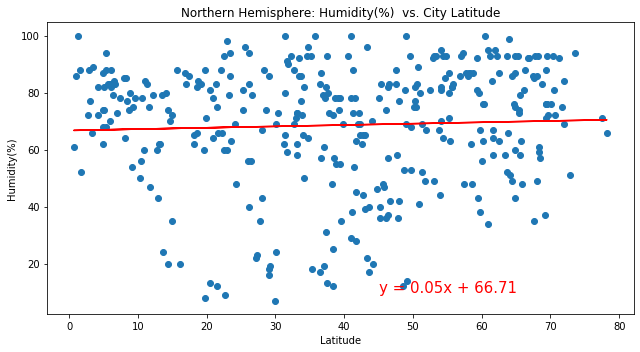

In [17]:
#Northern Hemisphere - Humidity(%)  vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_df['Lat'].astype('float')
y_values = Northern_df['Humidity'].astype('float')


# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel("Humidity(%)")
plt.title("Northern Hemisphere: Humidity(%)  vs. City Latitude")

# Print r square value
print(f"R squared: {(rvalue**2):5.2f}")


# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Northern Hemisphere City Latitude vs Cloudiness.png")

# Show plot
plt.show()

Extremely poor correlation! Worst possible value!

R squared:  0.00


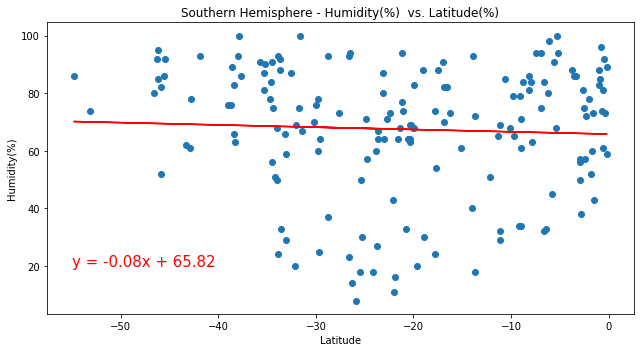

In [19]:
#Southern Hemisphere - Humidity(%)  vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_df['Lat'].astype('float')
y_values = Southern_df['Humidity'].astype('float')


# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel("Humidity(%)")
plt.title("Southern Hemisphere - Humidity(%)  vs. Latitude(%)")

# Print r square value
print(f"R squared: {(rvalue**2):5.2f}")


# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Southern Hemisphere - Humidity vs. City Latitude.png")

# Show plot
plt.show()

Similar trend to the N-S plot. Again a very poor correltaion. 

R squared:  0.00


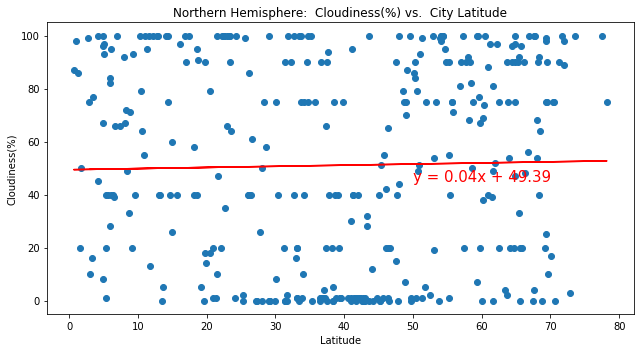

In [21]:
#Northern Hemisphere - Cloudiness vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_df['Lat'].astype('float')
y_values = Northern_df['Cloudiness'].astype('float')


# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel("Cloudiness(%)")
plt.title("Northern Hemisphere:  Cloudiness(%) vs.  City Latitude")

# Print r square value
print(f"R squared: {(rvalue**2):5.2f}")


# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Northern Hemisphere Cloudiness vs City Latitude.png")

# Show plot
plt.show()

Similar trend to the N-S plot. Again a very poor correltaion. 

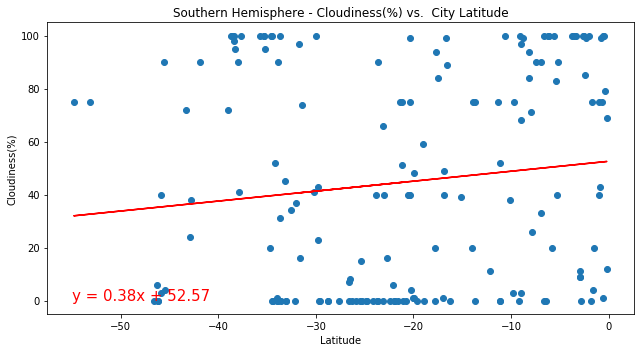

In [23]:
#Southern Hemisphere -  Cloudiness vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_df['Lat'].astype('float')
y_values = Southern_df['Cloudiness'].astype('float')


# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,0),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel("Cloudiness(%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs.  City Latitude")

# Print r square value
# print(f"R squared: {rvalue**2}")

# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Southern Hemisphere - Cloudiness vs City Latitude.png")

# Show plot
plt.show()

Similar trend to the N-S plot. Again a very poor correltaion. 

R squared:  0.01


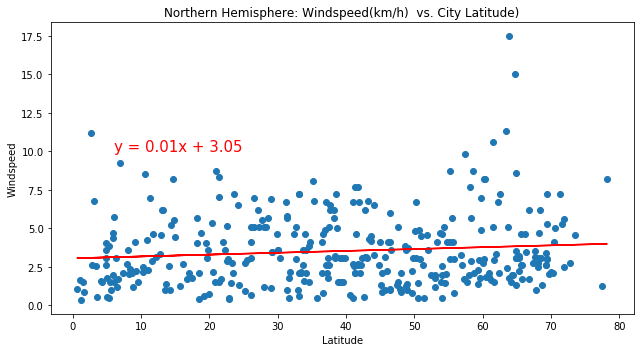

In [25]:
#Northern Hemisphere - Windspeed vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_df['Lat'].astype('float')
y_values = Northern_df['Windspeed'].astype('float')


# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title("Northern Hemisphere: Windspeed(km/h)  vs. City Latitude)")

# Print r square value
print(f"R squared: {(rvalue**2):5.2f}")


# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Northern Hemisphere: City Latitude vs Windspeed.png")

# Show plot
plt.show()

Similar trend to the N-S plot. Again a very poor correltaion. 

R squared:  0.00


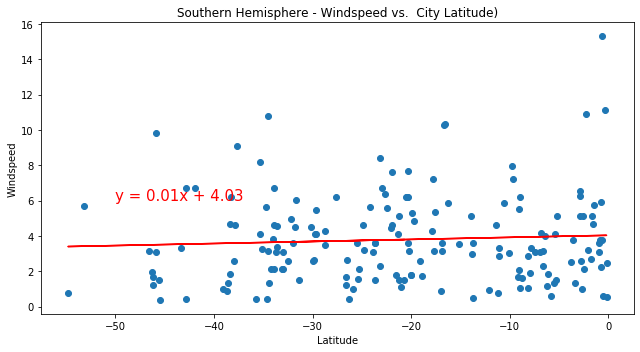

In [27]:
#Southern Hemisphere - Windspeed vs. Latitude
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_df['Lat'].astype('float')
y_values = Southern_df['Windspeed'].astype('float')


# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(9,5))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")

# Label plot

plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title("Southern Hemisphere - Windspeed vs.  City Latitude)")

# Print r square value
print(f"R squared: {(rvalue**2):5.2f}")


# Save the figure
plt.tight_layout()
plt.savefig("../FINAL_images/Southern Hemisphere: Windspeed vs City Latitude.png")

# Show plot
plt.show()

Similar trend to the N-S plot. Again a very poor correltaion. 